# PCA Exploration

## Lit Review - hosseinadeli submission (Fred)

- 100 components - why? who knows

## Computing

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import sys
    
try:
    from utils import data_loading
except:
    sys.path.append('../utils')
    sys.path.append('../')
    from utils import data_loading

### Testing for subj1 for one hemisphere

In [15]:
#load data for subj1
data_lh = np.load('../../data/algonauts/subj01/training_split/training_fmri/lh_training_fmri.npy')
data_rh = np.load('../../data/algonauts/subj01/training_split/training_fmri/rh_training_fmri.npy')
print(f'LH shape: {data_lh.shape}\nRH Shape: {data_rh.shape}')

LH shape: (9841, 19004)
RH Shape: (9841, 20544)


In [16]:
# #exploratory PCA for right hemisphere
pca = PCA(n_components=9841) # n_components must be between min(n_smaples, n_features), hence 9841
pca.fit(data_rh)

PCA(n_components=9841)

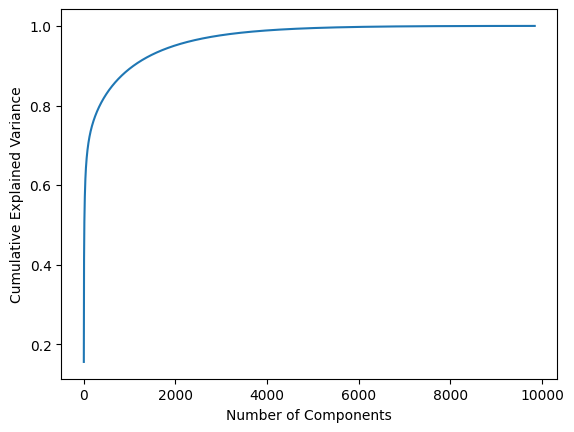

In [17]:
# # plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

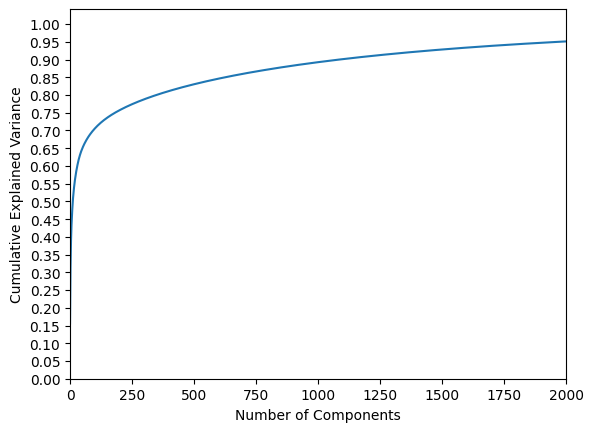

In [18]:
#same plot but zoomed in on num_components 0-2000
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xlim(0, 2000)
plt.ylabel('Cumulative Explained Variance')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [19]:
#get the index of the first component with which me can explain 95% of variance
var = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(var >= .95)[0]
idx[0]

1970

### Looping through all subj and both hemispheres seperately

    adjust number of components in PCA and index in data loading to adjust for num of frmi images loaded

In [9]:
#define empty lists to create df later on
comp_90_rh = []
comp_95_rh = []
comp_99_rh = []
comp_90_lh = []
comp_95_lh = []
comp_99_lh = []
rmse_rh = []
rmse_lh = []
subj = []

#loop thorugh each subject to perform PCA on each hemisphere separately
for subject in range(1,8+1):
    subj.append(str(subject))
    #load data
    path = '../../data/algonauts/subj0' + str(subject)
    data_lh = np.load(path + '/training_split/training_fmri/lh_training_fmri.npy')
    data_rh = np.load(path + '/training_split/training_fmri/rh_training_fmri.npy')

    #PCA_rh
    pca_rh = PCA(n_components=data_rh.shape[0])
    pca_rh.fit(data_rh)
    rh_transform = pca_rh.transform(data_rh)
    #PCA_lh
    pca_lh = PCA(n_components=data_rh.shape[0])
    pca_lh.fit(data_lh)
    lh_transform = pca_lh.transform(data_lh)

    #get the index of the first component with which me can explain 95% of variance
    ##rh
    var_rh = np.cumsum(pca_rh.explained_variance_ratio_)
    comp_90_rh.append(np.where(var_rh >= .90)[0][0])
    comp_95_rh.append(np.where(var_rh >= .95)[0][0])
    comp_99_rh.append(np.where(var_rh >= .99)[0][0])
    ##lh
    var_lh = np.cumsum(pca_lh.explained_variance_ratio_)
    comp_90_lh.append(np.where(var_lh >= .90)[0][0])
    comp_95_lh.append(np.where(var_lh >= .95)[0][0])
    comp_99_lh.append(np.where(var_lh >= .99)[0][0])

    #calculate MSE on inversed data
    ##rh
    inversed_rh = pca_rh.inverse_transform(rh_transform)
    rmse_rh.append(np.sqrt(((data_rh-inversed_rh)**2).mean()))
    ##lh
    inversed_lh = pca_lh.inverse_transform(lh_transform)
    rmse_lh.append(np.sqrt(((data_lh-inversed_lh)**2).mean()))

#store results in a df
PCA_results_separate = pd.DataFrame({'Subject': subj, '90% Component RH': comp_90_rh, '90% Component LH': comp_90_lh,
                           '95% Component RH': comp_95_rh, '95% Component LH': comp_95_lh,
                           '99% Component RH': comp_99_rh, '99% Component LH': comp_99_lh,
                           'Inverse RSME RH': rmse_rh, 'Inverse RSME LH': rmse_lh})

#print results
PCA_results_separate

,Subject,90% Component RH,90% Component LH,95% Component RH,95% Component LH,99% Component RH,99% Component LH,Inverse RSME RH,Inverse RSME LH
0,1,1086,1135,1970,2018,4168,4202,0.000006,0.000003
1,2,1025,1121,1874,2018,4036,4265,0.000003,0.000004
2,3,1256,1276,2165,2157,4376,4296,0.000002,0.000002
3,4,1014,1122,1824,1940,3827,3931,0.000002,0.000002
4,5,757,718,1524,1468,3605,3485,0.000002,0.000003
5,6,1026,1128,1920,1980,4135,4077,0.000002,0.000002
6,7,1001,938,1843,1710,4000,3707,0.000002,0.000004
7,8,975,988,1808,1769,3940,3760,0.000002,0.000002


In [10]:
print(f'Number of Components for 90%: {max(comp_90_rh + comp_90_lh)}\n',
    f'Number of Components for 95%: {max(comp_95_rh + comp_95_lh)}\n',
    f'Number of Components for 99%: {max(comp_99_rh + comp_99_lh)}')

Number of Components for 90%: 1276
 Number of Components for 95%: 2165
 Number of Components for 99%: 4376


In [11]:
PCA_results_separate.to_csv('../../output/PCA_results_seperate.csv')

### Looping through all subj and both hemispheres combined

    adjust number of components in PCA and index in data loading to adjust for num of frmi images loaded

In [12]:
#define empty lists to create df later on
comp_90 = []
comp_95 = []
comp_99 = []
rmse = []
subj = []

#loop thorugh each subject to perform PCA on  on both hemipsheres combined
for subject in range(1,8+1):
    subj.append(str(subject))
    #load data
    path = '../../data/algonauts/subj0' + str(subject)
    data_lh = np.load(path + '/training_split/training_fmri/lh_training_fmri.npy')
    data_rh = np.load(path + '/training_split/training_fmri/rh_training_fmri.npy')
    #concat both hemispheres
    brain = np.concatenate((data_lh, data_rh), axis = 1)

    #PCA
    pca_brain = PCA(n_components=brain.shape[0])
    pca_brain.fit(brain)
    brain_transform = pca_brain.transform(brain)

    #get the index of the first component with which me can explain 95% of variance
    var_brain = np.cumsum(pca_brain.explained_variance_ratio_)
    comp_90.append(np.where(var_brain >= .90)[0][0])
    comp_95.append(np.where(var_brain >= .95)[0][0])
    comp_99.append(np.where(var_brain >= .99)[0][0])

    #calculate MSE on inversed data
    inversed_brain = pca_brain.inverse_transform(brain_transform)
    rmse.append(np.sqrt(((brain-inversed_brain)**2).mean()))

#store results in a df
PCA_results_combined = pd.DataFrame({'Subject': subj, '90% Component': comp_90,'95% Component': comp_95,
                           '99% Component': comp_99,'Inverse RSME': rmse})

#print results
PCA_results_combined

,Subject,90% Component,95% Component,99% Component,Inverse RSME
0,1,1732,3059,6035,0.000002
1,2,1673,2981,5963,0.000002
2,3,1900,3187,5972,0.000002
3,4,1608,2792,5445,0.000002
4,5,1168,2332,5241,0.000002
5,6,1617,2873,5697,0.000002
6,7,1532,2764,5663,0.000002
7,8,1450,2603,5301,0.000002


In [13]:
print(f'Number of Components for 90%: {max(comp_90)}\n',
    f'Number of Components for 95%: {max(comp_95)}\n',
    f'Number of Components for 99%: {max(comp_99)}')

Number of Components for 90%: 1900
 Number of Components for 95%: 3187
 Number of Components for 99%: 6035


In [14]:
PCA_results_combined.to_csv('../../output/PCA_results_combined.csv')

### Window method for all subj and both hemispheres combined

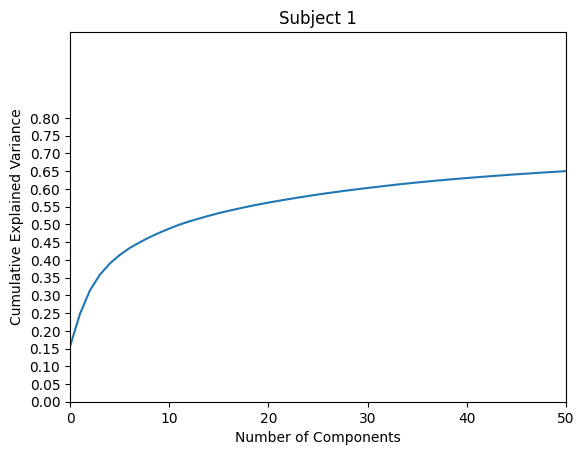

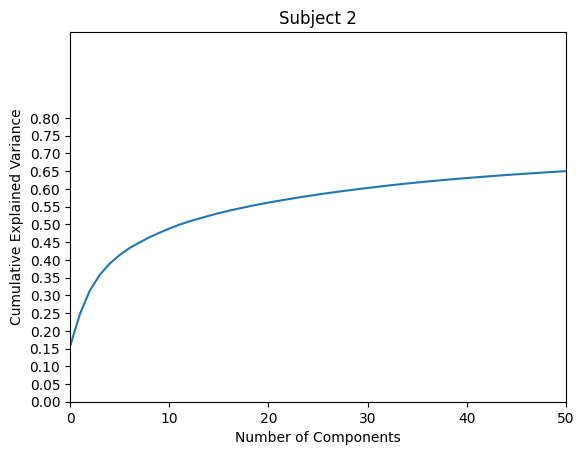

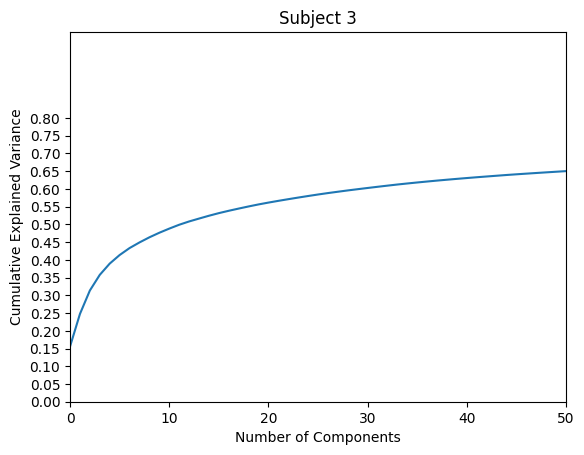

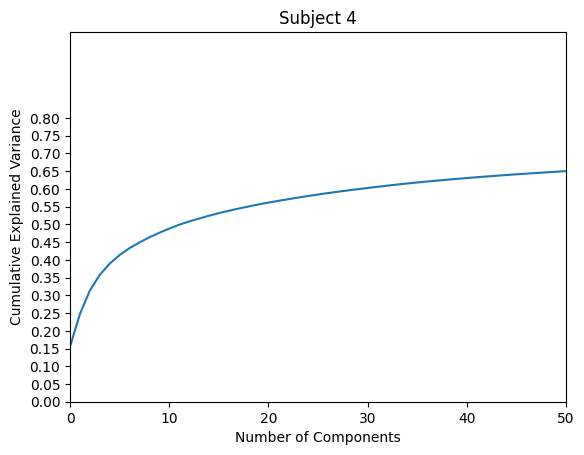

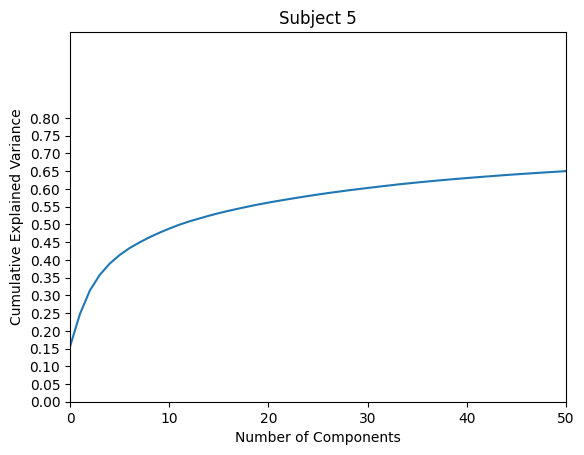

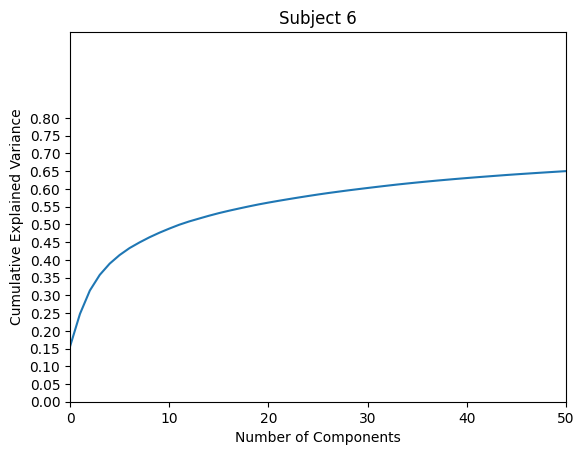

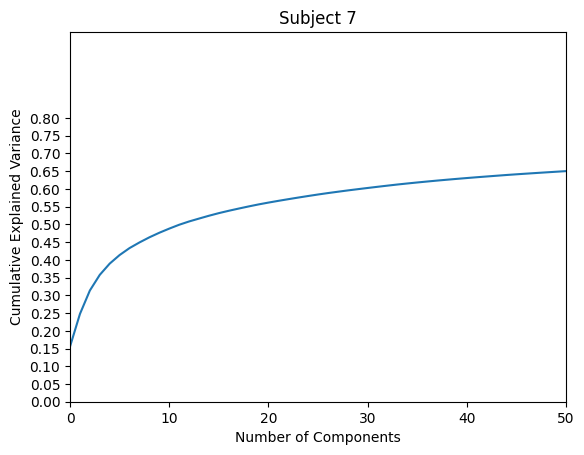

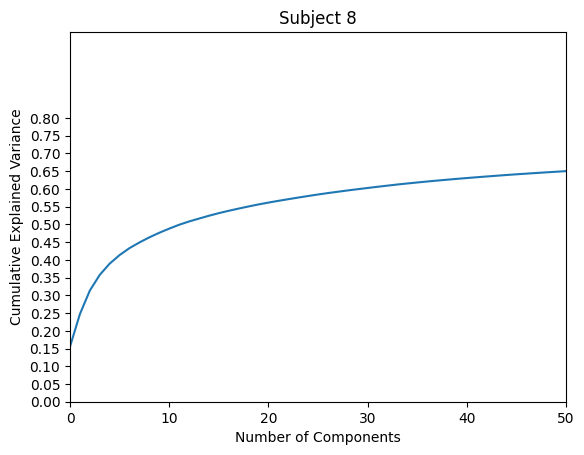

In [26]:
#loop thorugh each subject to perform PCA on both hemipsheres combined
for subject in range(1,8+1):
    subj.append(str(subject))
    #load data
    path = '../../data/algonauts/subj0' + str(subject)
    data_lh = np.load(path + '/training_split/training_fmri/lh_training_fmri.npy')
    data_rh = np.load(path + '/training_split/training_fmri/rh_training_fmri.npy')
    #concat both hemispheres
    brain = np.concatenate((data_lh, data_rh), axis = 1)

    #PCA
    pca_brain = PCA(n_components=brain.shape[0])
    pca_brain.fit(brain)
    brain_transform = pca_brain.transform(brain)

    #plot but  explained variance ratio zoomed in on num_components 0-100
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.xlim(0, 50)
    plt.ylabel('Cumulative Explained Variance')
    plt.yticks(np.arange(0, .85, 0.05))
    plt.title(f'Subject {subject}')
    plt.show()